In [ ]:
! git clone https://github.com/Kiduse123/ds3001group

Cloning into 'ds3001group'...
remote: Enumerating objects: 516, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (129/129), done.
remote: Total 516 (delta 103), reused 37 (delta 33), pack-reused 353 (from 1)
Receiving objects: 100% (516/516), 45.31 MiB | 11.27 MiB/s, done.
Resolving deltas: 100% (253/253), done.


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Read in files

outcomes = pd.read_excel("sample_data/WinningPartyByCounties.xlsx") # party outcome at county level

rawdemo2012 = pd.read_excel("sample_data/demographicsallstates2012.xlsx") # demographic variables at county level 2012
rawdemo2016 = pd.read_excel("sample_data/demographicsallstates2016.xlsx") # demographic variables at county level 2016
rawdemo2020 = pd.read_excel("sample_data/demographicsallstates2020.xlsx") # demographic variables at county level 2020

wipoverty = pd.read_csv("sample_data/wipoverty.csv") # poverty variable at county level -- Wisconsin
wipoverty = wipoverty.drop([0,1, 38, 39]) # Drop national and state level statistics

In [47]:
# Filter files for Wisconsin

wioutcomes = outcomes[outcomes['state'] == 'WISCONSIN'] # filtered outcome variable for Wisconsin

demo2012 = rawdemo2012[rawdemo2012['State Name'] == 'Wisconsin']
demo2016 = rawdemo2016[rawdemo2016['State Name'] == 'Wisconsin']
demo2020 = rawdemo2020[rawdemo2020['State Name'] == 'Wisconsin'] # filtered demographic variables for Wisconsin

In [48]:
# Separate outcomes & poverty by year

wioutcomes2012 = wioutcomes[wioutcomes['year'] == 2012]
wioutcomes2016 = wioutcomes[wioutcomes['year'] == 2016]
wioutcomes2020 = wioutcomes[wioutcomes['year'] == 2020] # separated outcomes variable by year

wipoverty2012 = wipoverty[wipoverty['Year'] == 2012]
wipoverty2016 = wipoverty[wipoverty['Year'] == 2016]
wipoverty2020 = wipoverty[wipoverty['Year'] == 2020] # separated poverty variable by year

In [49]:
# Merge

election2012 = pd.merge(demo2012, wipoverty2012, left_on='County Name', right_on='Name', how='outer') # Merge poverty with demographics
election2012 = pd.merge(election2012, wioutcomes2012, left_on='ID', right_on='county_fips', how='outer') # Merge outcomes with election2012
# now have a complete file for 2012

election2016 = pd.merge(demo2016, wipoverty2016, left_on='County Name', right_on='Name', how='outer') # Merge poverty with demographics
election2016 = pd.merge(election2016, wioutcomes2016, left_on='ID', right_on='county_fips', how='outer') # Merge outcomes with election2016
# now have a complete file for 2016

election2020 = pd.merge(demo2020, wipoverty2020, left_on='County Name', right_on='Name', how='outer') # Merge poverty with demographics
election2020 = pd.merge(election2020, wioutcomes2020, left_on='ID', right_on='county_fips', how='outer') # Merge outcomes with election2012
# now have a complete file for 2020

In [50]:
# Wrangling

election2012['Percent in Poverty'].unique()
election2016['Percent in Poverty'].unique()
election2020['Percent in Poverty'].unique()

election2012['Percent in Poverty'].value_counts()
election2016['Percent in Poverty'].value_counts()
election2020['Percent in Poverty'].value_counts()

election2012['Percent in Poverty'].isnull().sum() # No missing values
election2016['Percent in Poverty'].isnull().sum() # No missing values
election2020['Percent in Poverty'].isnull().sum() # No missing values

4

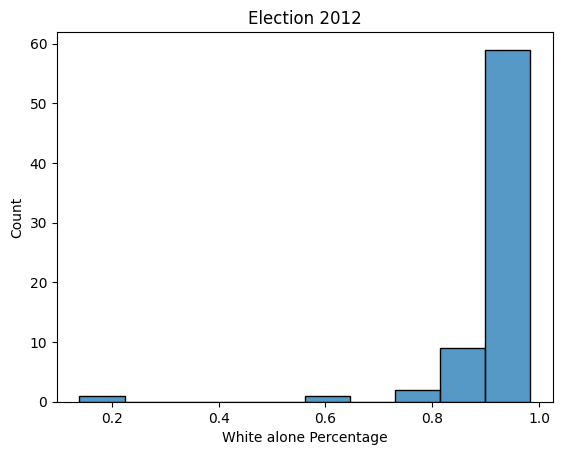

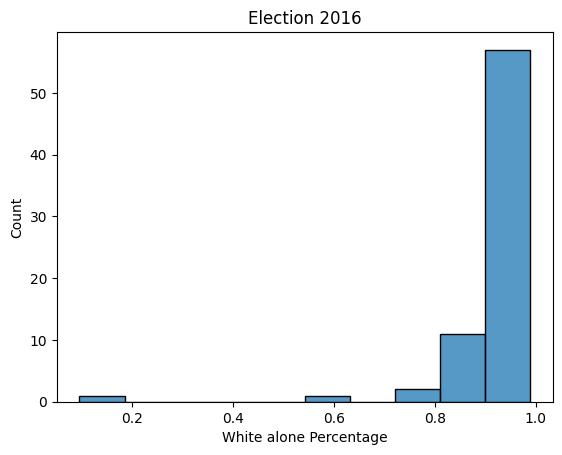

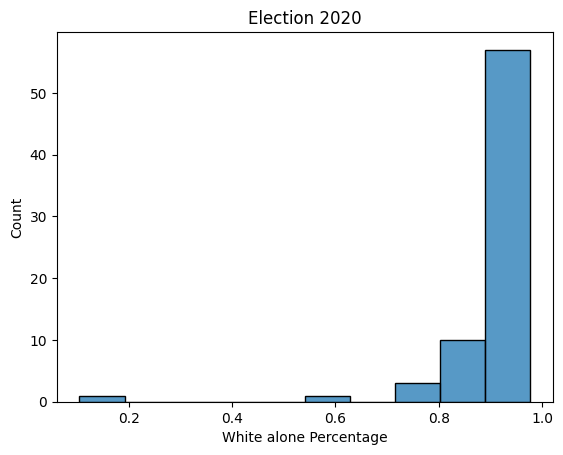

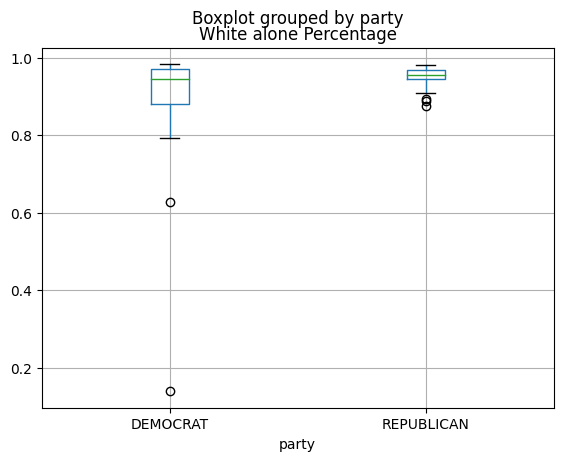

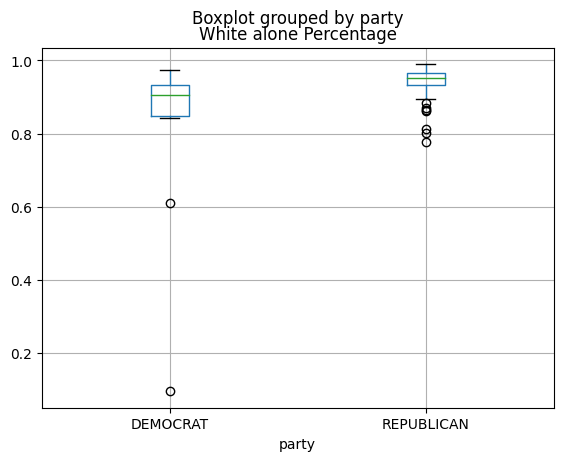

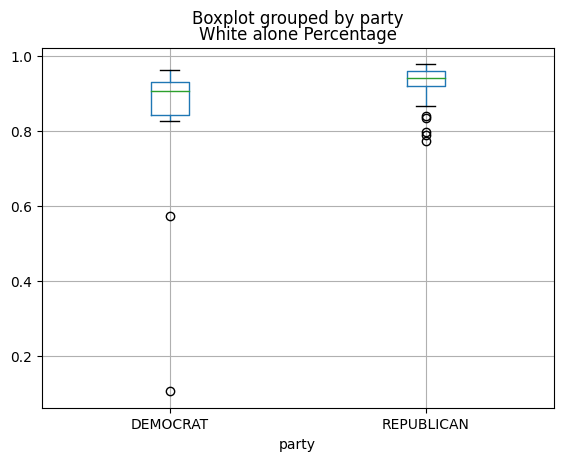

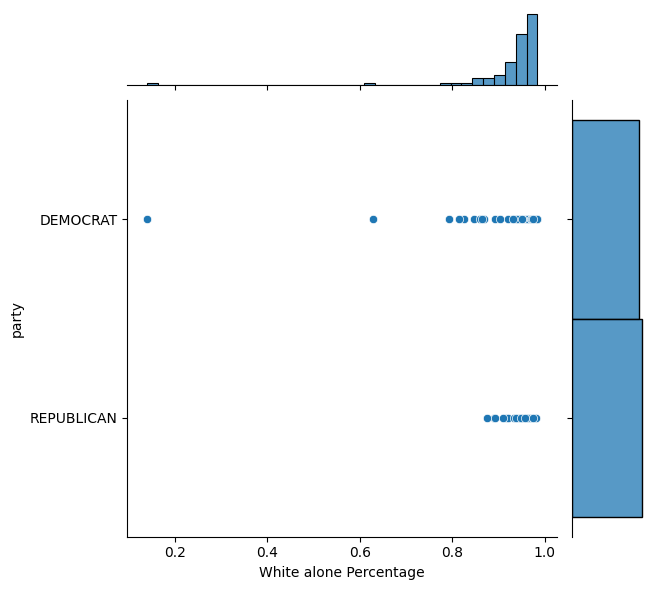

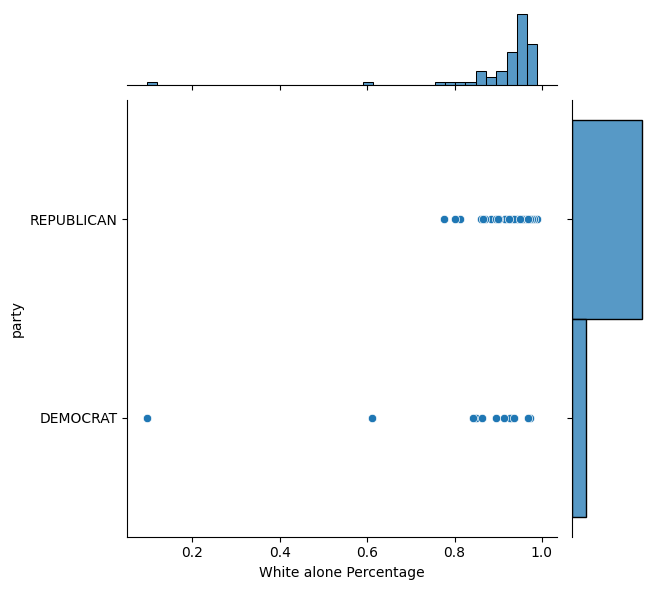

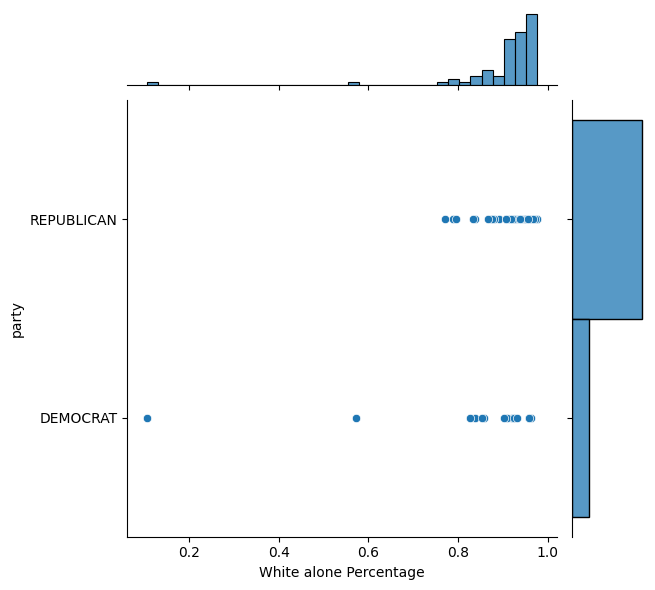

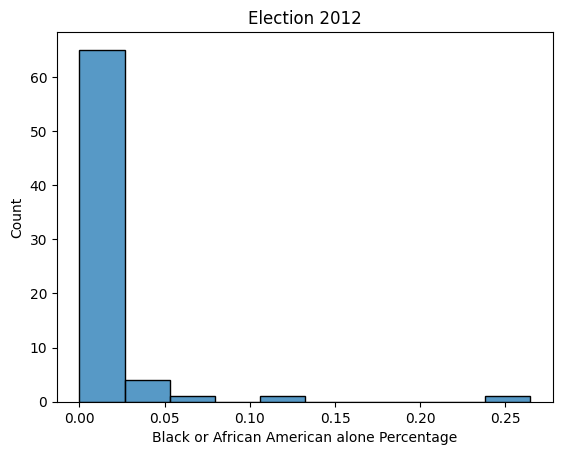

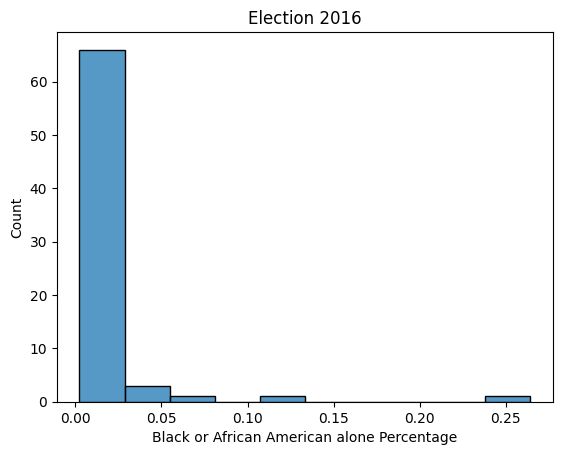

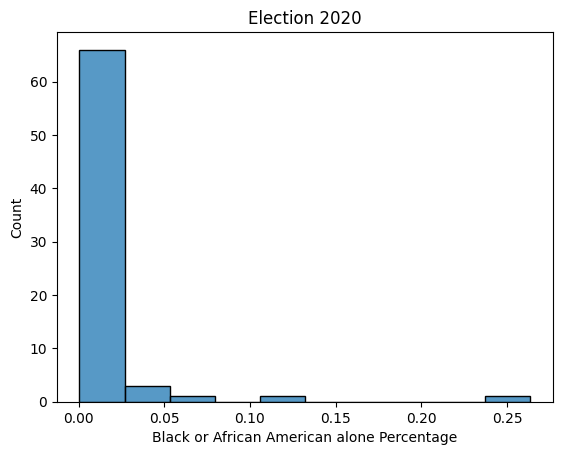

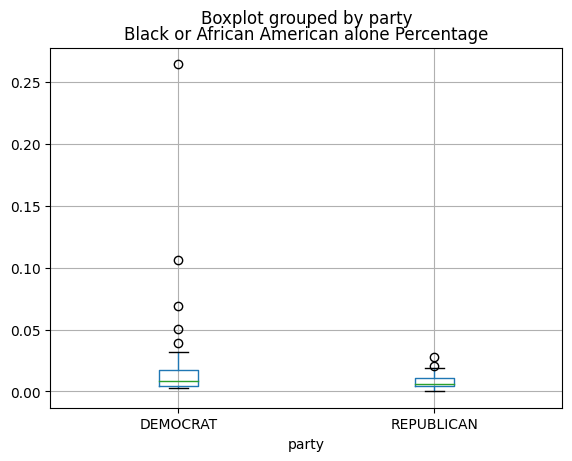

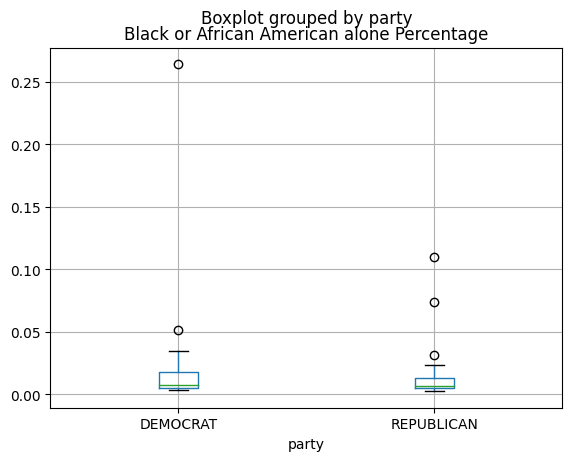

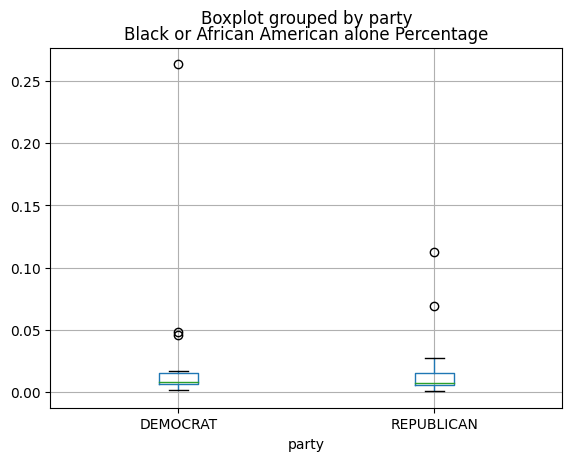

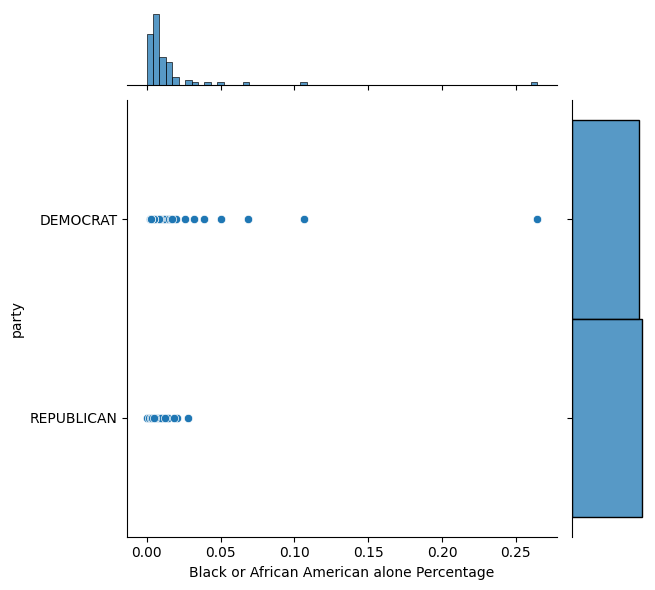

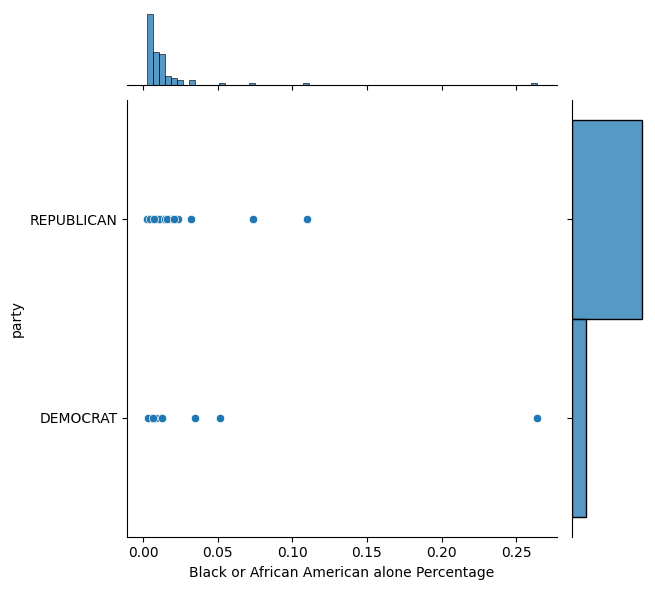

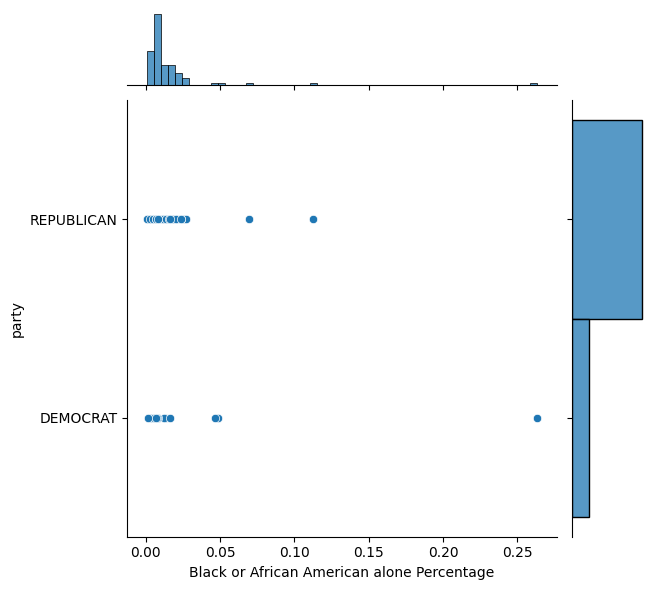

In [51]:
# EDA - Race

sns.histplot(election2012['White alone Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2012')
sns.histplot(election2016['White alone Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2016')
sns.histplot(election2020['White alone Percentage'], bins = 10, figure=plt.figure()) # Histogram distribution of White people
plt.title('Election 2020')

election2012.boxplot(column = 'White alone Percentage',by = 'party')
election2016.boxplot(column = 'White alone Percentage',by = 'party')
election2020.boxplot(column = 'White alone Percentage',by = 'party') # Boxplot of White people by voted party

sns.jointplot(x=election2012['White alone Percentage'],y=election2012['party'])
sns.jointplot(x=election2016['White alone Percentage'],y=election2016['party'])
sns.jointplot(x=election2020['White alone Percentage'],y=election2020['party']) # Joint plots (histogram x scatterplot)


sns.histplot(election2012['Black or African American alone Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2012')
sns.histplot(election2016['Black or African American alone Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2016')
sns.histplot(election2020['Black or African American alone Percentage'], bins = 10, figure=plt.figure()) # Histogram distribution of Black people
plt.title('Election 2020')

election2012.boxplot(column = 'Black or African American alone Percentage',by = 'party')
election2016.boxplot(column = 'Black or African American alone Percentage',by = 'party')
election2020.boxplot(column = 'Black or African American alone Percentage',by = 'party') # Boxplot of Black people by voted party

sns.jointplot(x=election2012['Black or African American alone Percentage'],y=election2012['party'])
sns.jointplot(x=election2016['Black or African American alone Percentage'],y=election2016['party'])
sns.jointplot(x=election2020['Black or African American alone Percentage'],y=election2020['party']) # Joint plots (histogram x scatterplot)

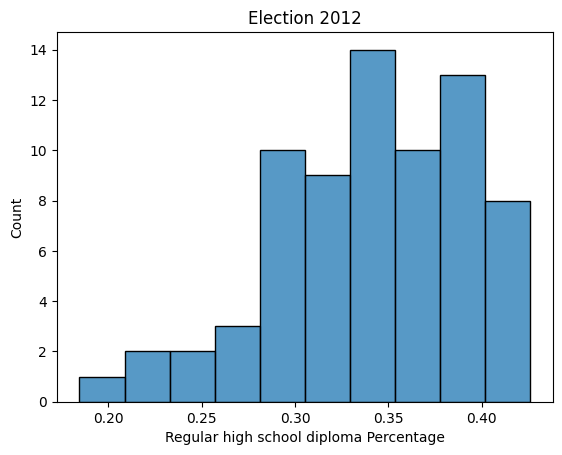

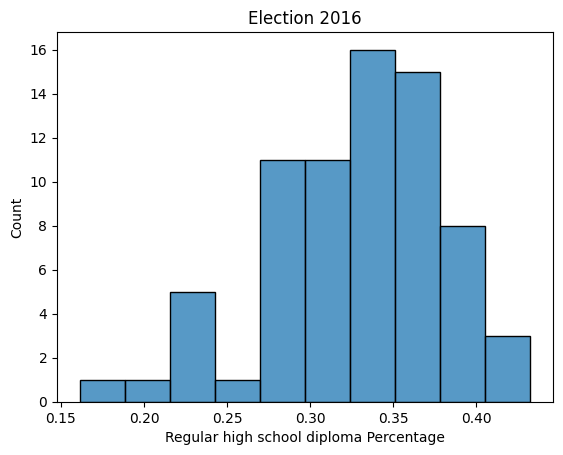

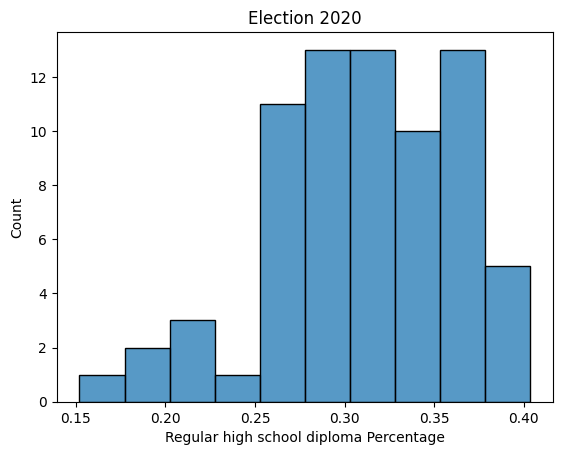

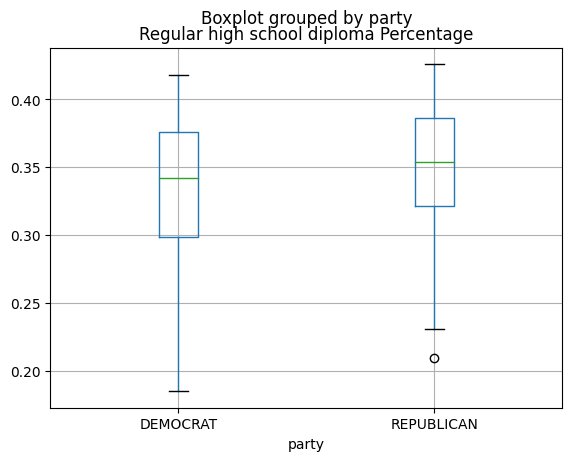

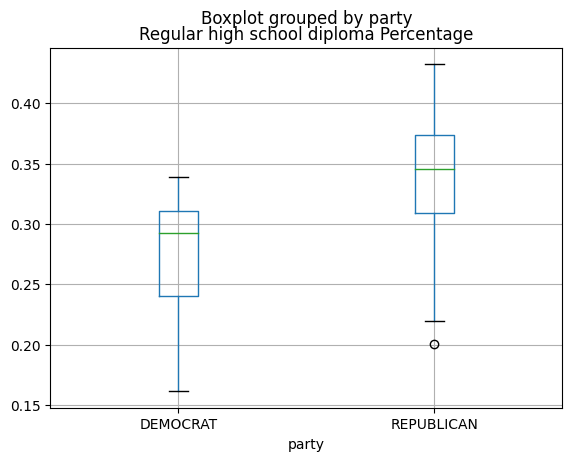

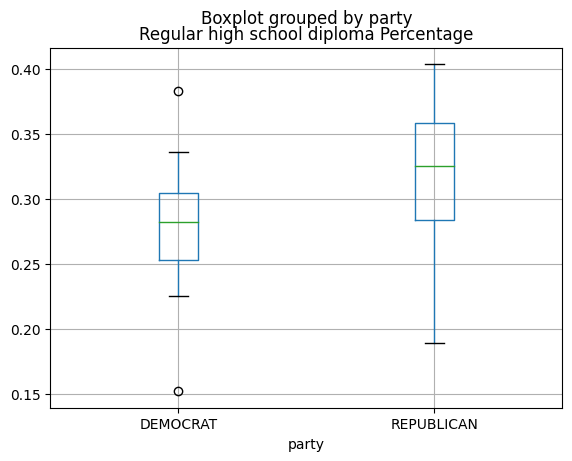

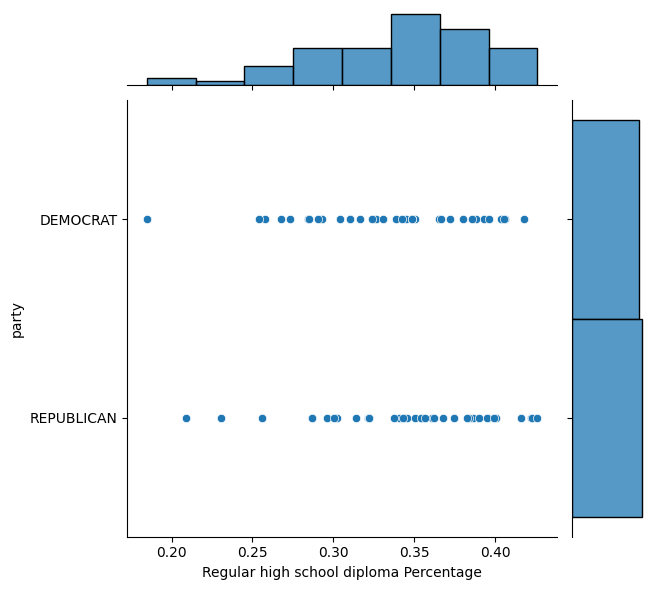

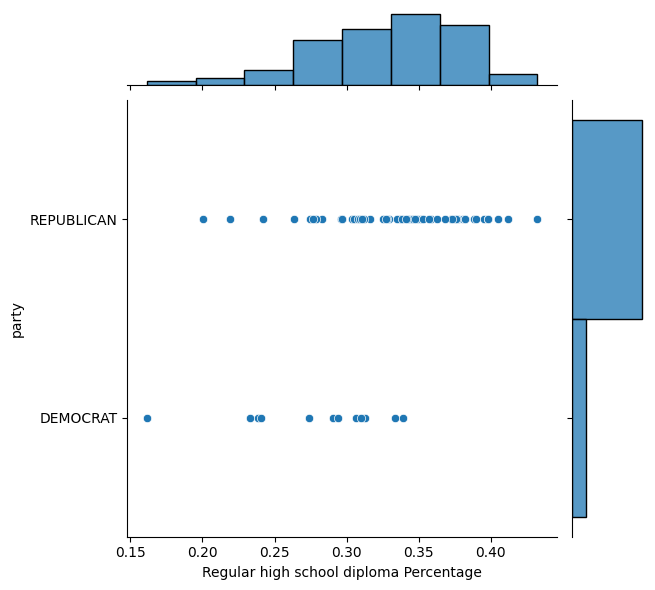

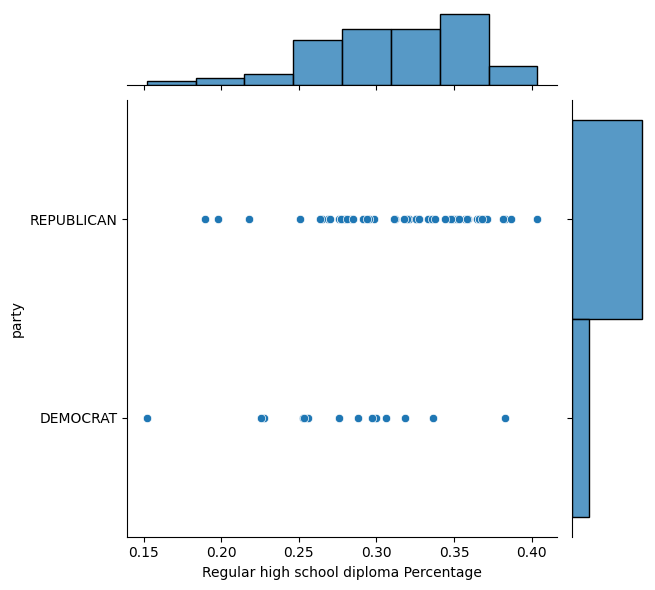

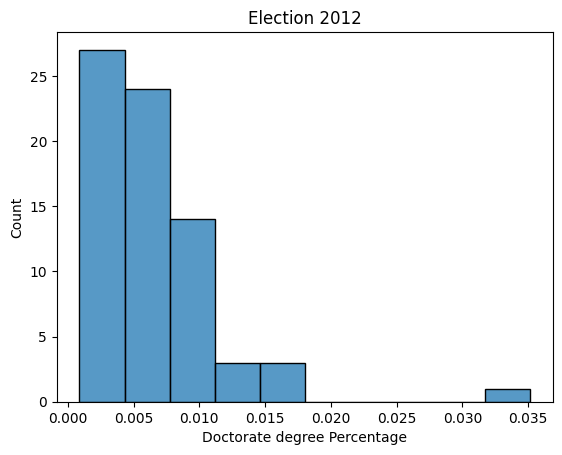

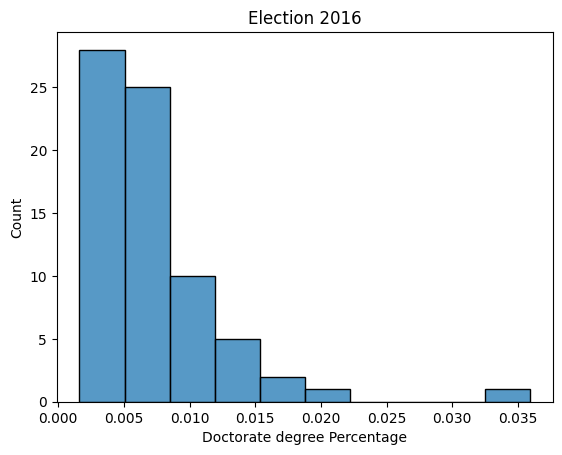

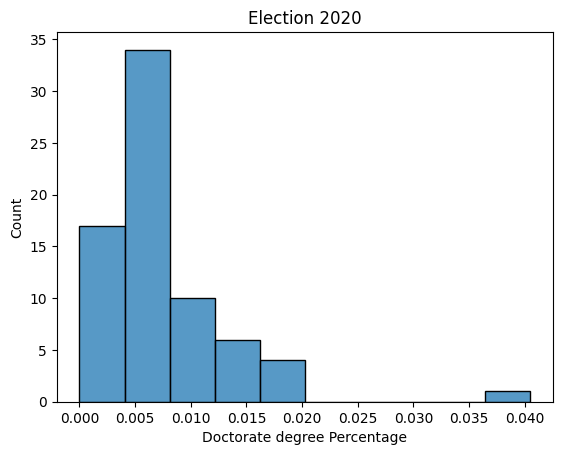

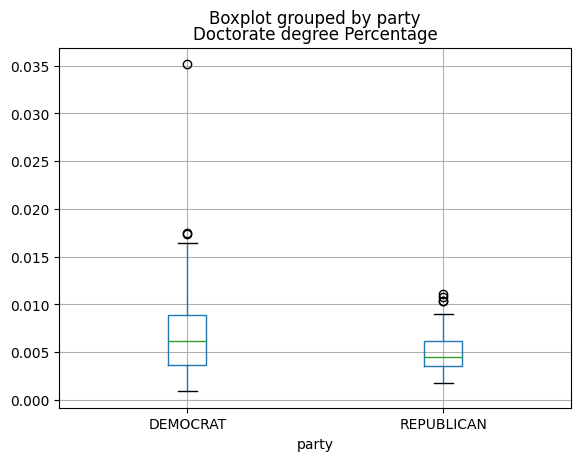

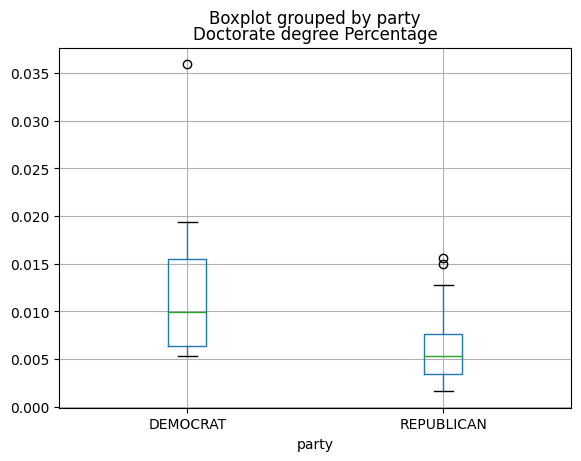

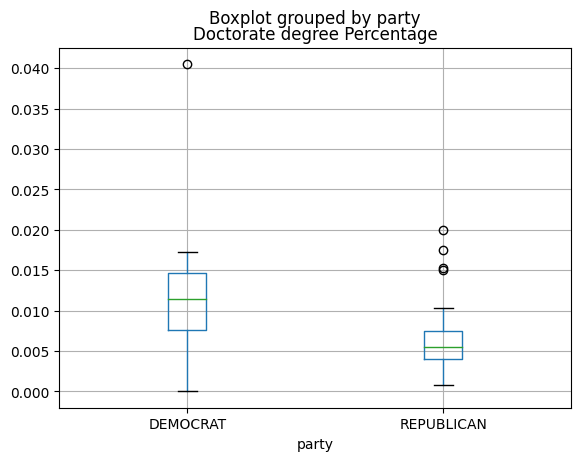

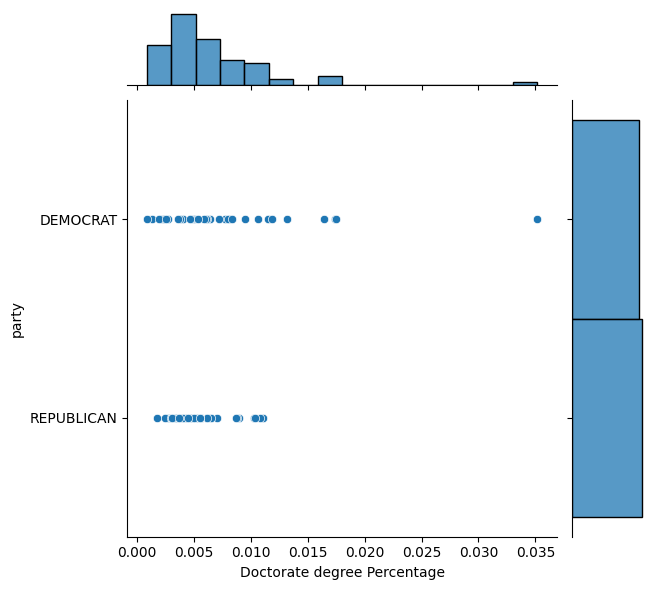

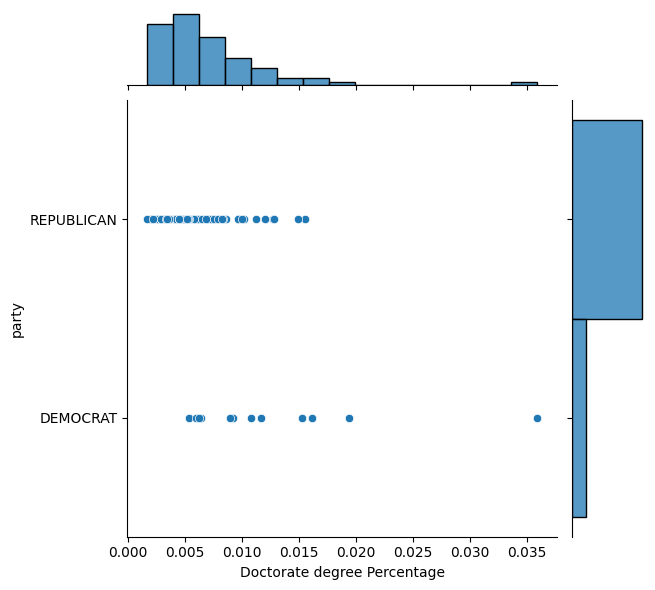

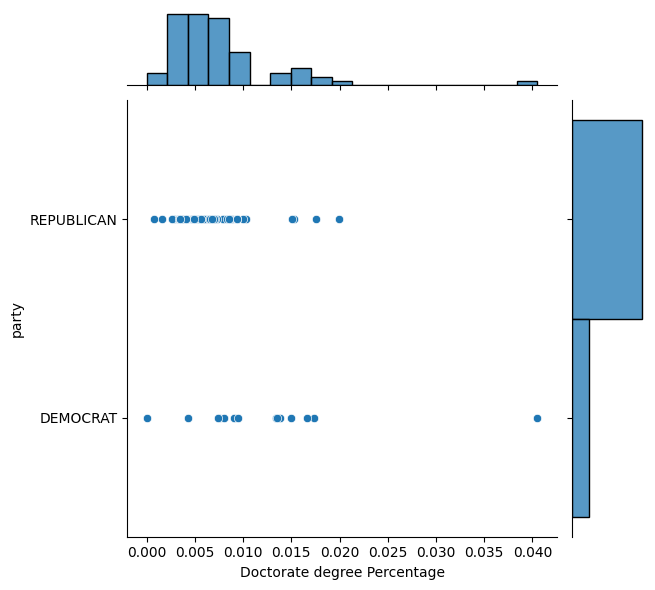

In [52]:
# EDA - Education

sns.histplot(election2012['Regular high school diploma Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2012')
sns.histplot(election2016['Regular high school diploma Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2016')
sns.histplot(election2020['Regular high school diploma Percentage'], bins = 10, figure=plt.figure()) # Histogram distribution of those with a high school diploma
plt.title('Election 2020')

election2012.boxplot(column = 'Regular high school diploma Percentage',by = 'party')
election2016.boxplot(column = 'Regular high school diploma Percentage',by = 'party')
election2020.boxplot(column = 'Regular high school diploma Percentage',by = 'party') # Boxplot of high school graduates by voted party

sns.jointplot(x=election2012['Regular high school diploma Percentage'],y=election2012['party'])
sns.jointplot(x=election2016['Regular high school diploma Percentage'],y=election2016['party'])
sns.jointplot(x=election2020['Regular high school diploma Percentage'],y=election2020['party']) # Joint plots (histogram x scatterplot)


sns.histplot(election2012['Doctorate degree Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2012')
sns.histplot(election2016['Doctorate degree Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2016')
sns.histplot(election2020['Doctorate degree Percentage'], bins = 10, figure=plt.figure()) # Histogram distribution of those with a doctorate
plt.title('Election 2020')

election2012.boxplot(column = 'Doctorate degree Percentage',by = 'party')
election2016.boxplot(column = 'Doctorate degree Percentage',by = 'party')
election2020.boxplot(column = 'Doctorate degree Percentage',by = 'party') # Boxplot of proportion of doctors by voted party

sns.jointplot(x=election2012['Doctorate degree Percentage'],y=election2012['party'])
sns.jointplot(x=election2016['Doctorate degree Percentage'],y=election2016['party'])
sns.jointplot(x=election2020['Doctorate degree Percentage'],y=election2020['party']) # Joint plots (histogram x scatterplot)

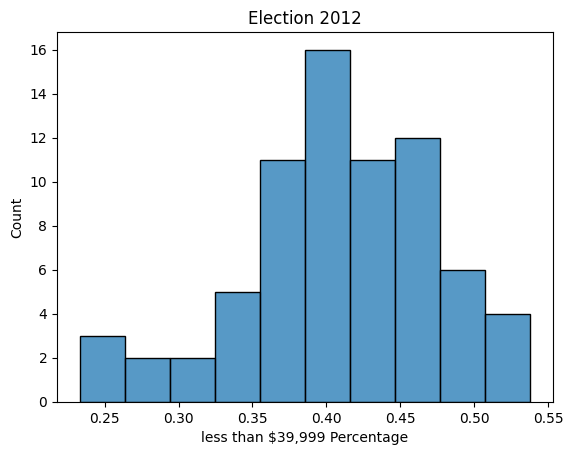

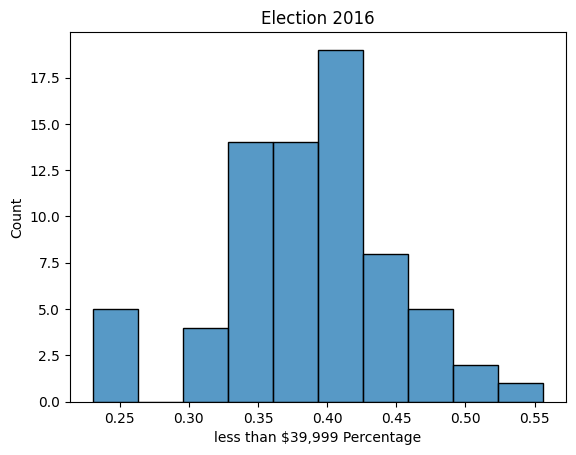

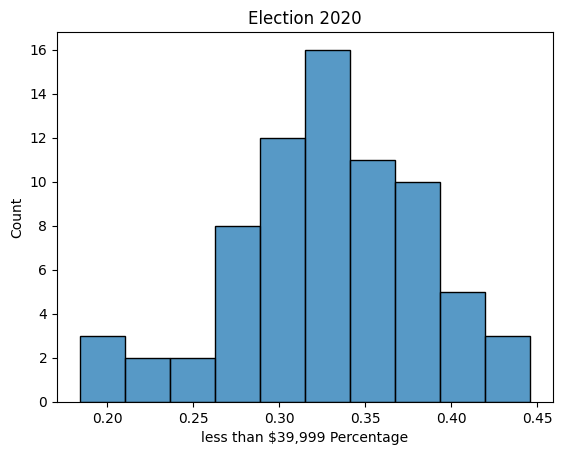

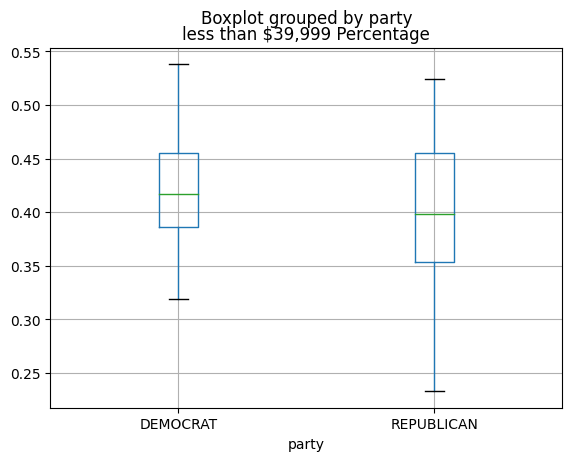

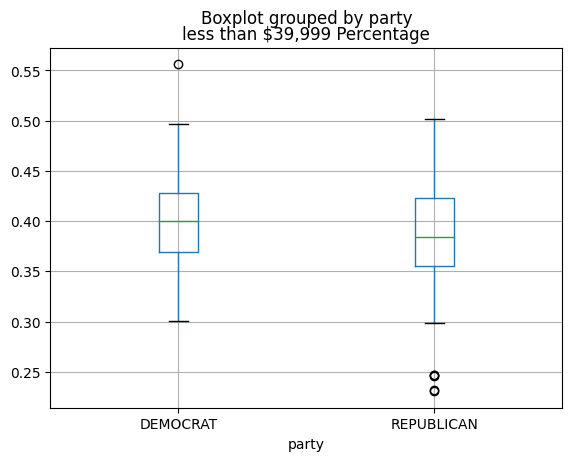

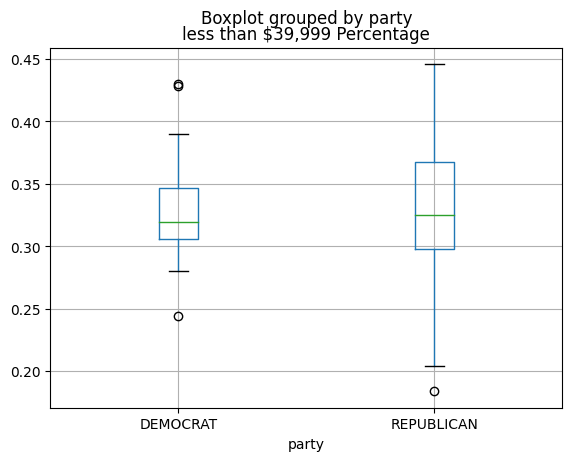

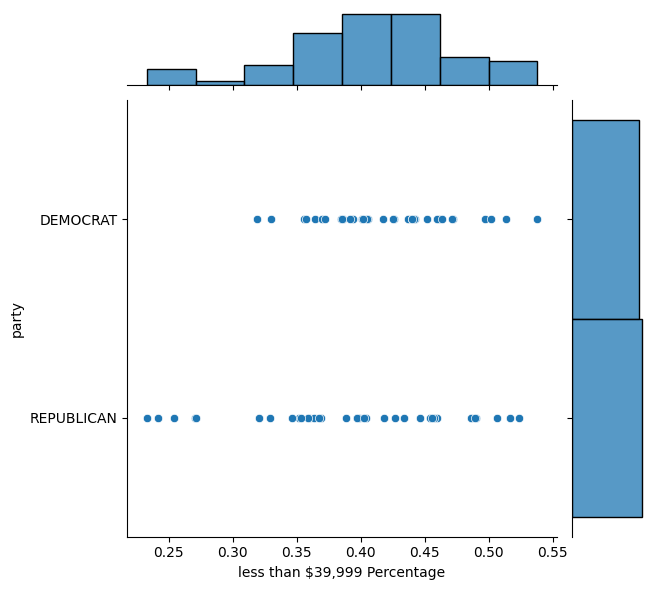

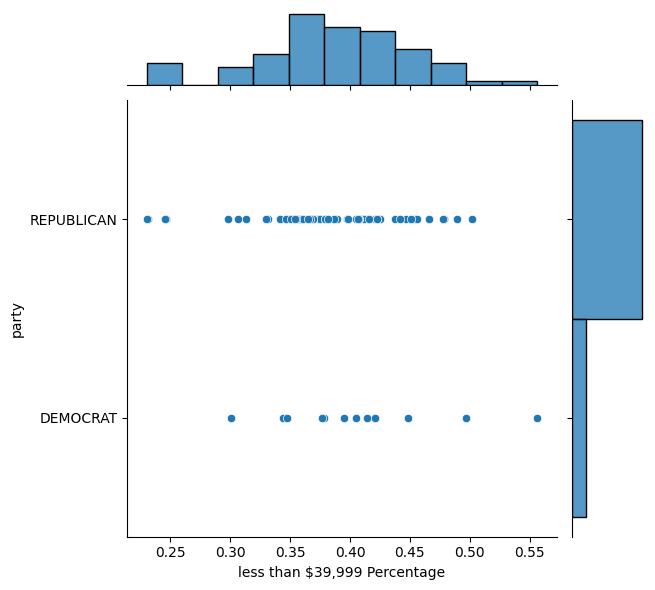

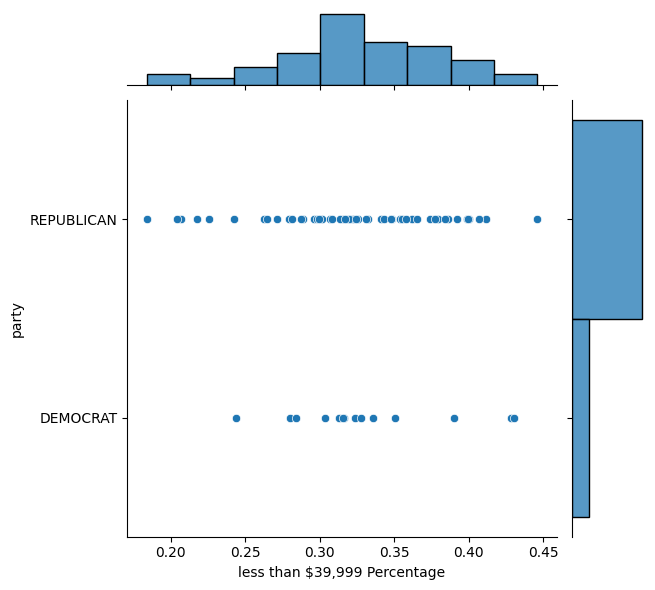

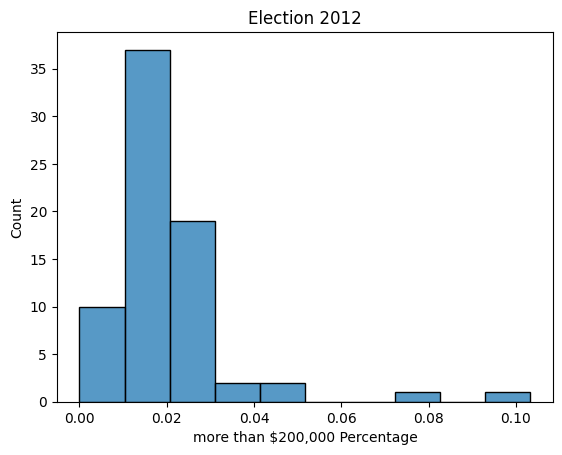

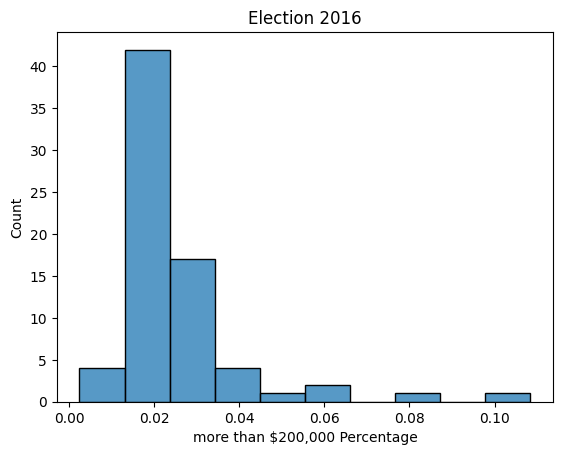

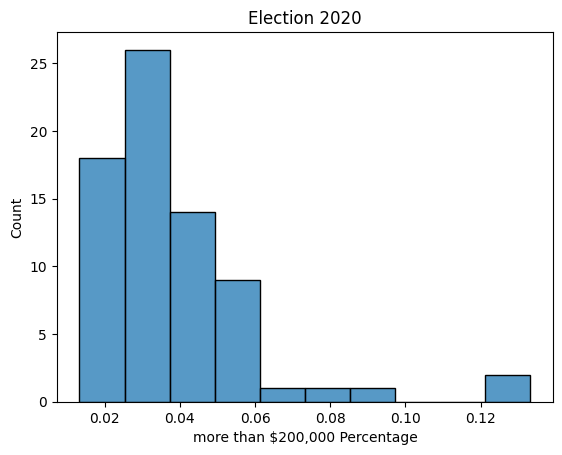

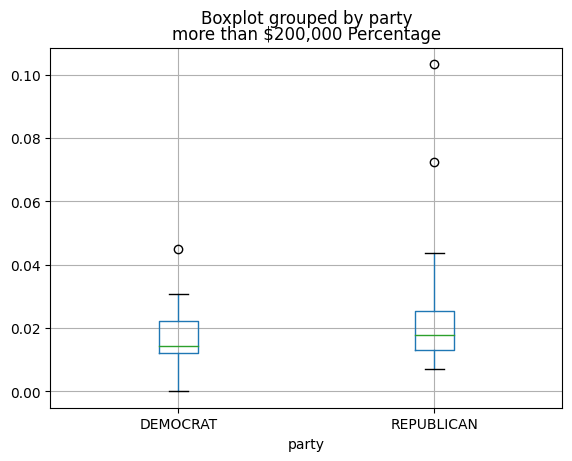

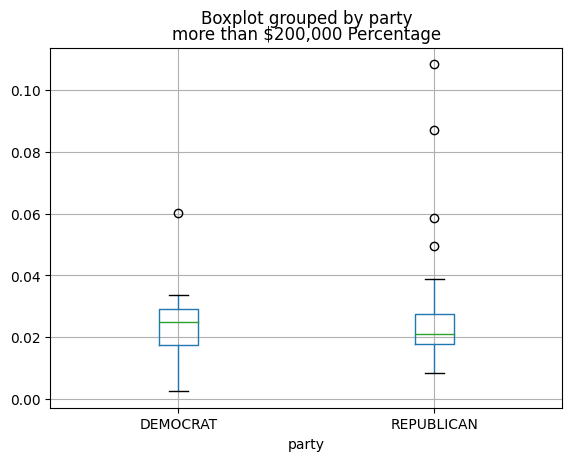

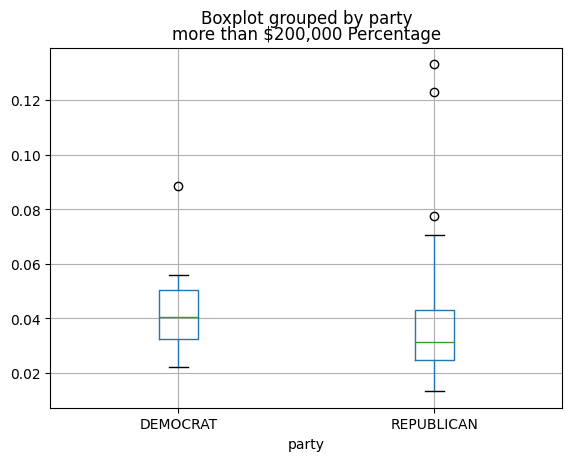

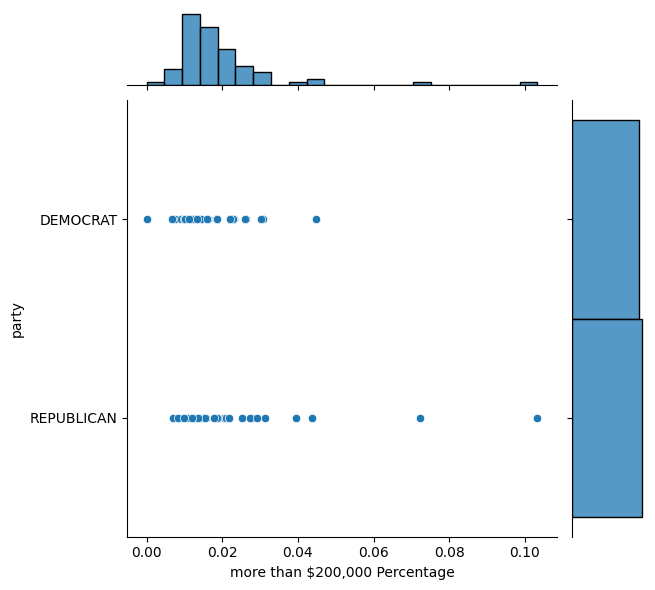

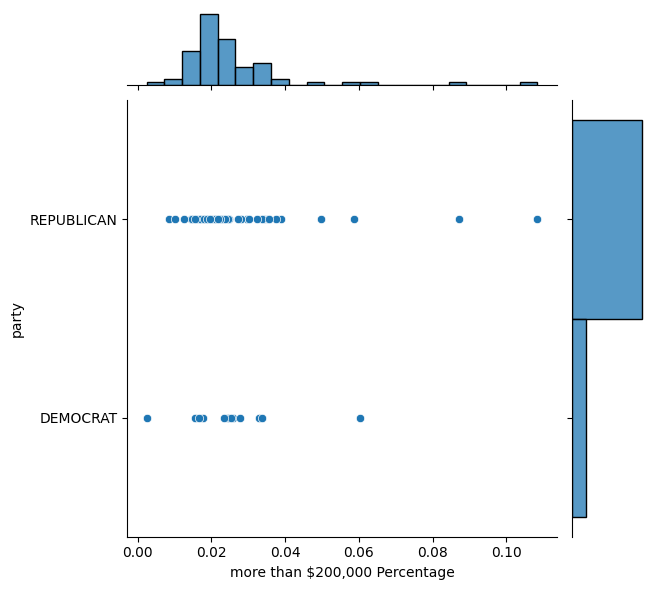

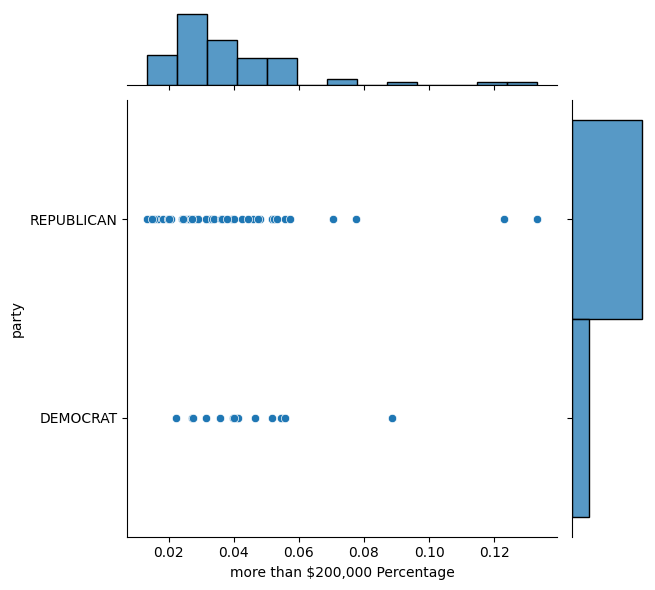

In [53]:
# EDA - Economic status

sns.histplot(election2012['less than $39,999 Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2012')
sns.histplot(election2016['less than $39,999 Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2016')
sns.histplot(election2020['less than $39,999 Percentage'], bins = 10, figure=plt.figure()) # Histogram distribution of incomes under $40k
plt.title('Election 2020')

election2012.boxplot(column = 'less than $39,999 Percentage',by = 'party')
election2016.boxplot(column = 'less than $39,999 Percentage',by = 'party')
election2020.boxplot(column = 'less than $39,999 Percentage',by = 'party') # Boxplot of proportion earning under $40k by voted party

sns.jointplot(x=election2012['less than $39,999 Percentage'],y=election2012['party'])
sns.jointplot(x=election2016['less than $39,999 Percentage'],y=election2016['party'])
sns.jointplot(x=election2020['less than $39,999 Percentage'],y=election2020['party']) # Joint plots (histogram x scatterplot)


sns.histplot(election2012['more than $200,000 Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2012')
sns.histplot(election2016['more than $200,000 Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2016')
sns.histplot(election2020['more than $200,000 Percentage'], bins = 10, figure=plt.figure()) # Histogram distribution of incomes over $200k
plt.title('Election 2020')

election2012.boxplot(column = 'more than $200,000 Percentage',by = 'party')
election2016.boxplot(column = 'more than $200,000 Percentage',by = 'party')
election2020.boxplot(column = 'more than $200,000 Percentage',by = 'party') # Boxplot of proportion earning over $200k by voted party

sns.jointplot(x=election2012['more than $200,000 Percentage'],y=election2012['party'])
sns.jointplot(x=election2016['more than $200,000 Percentage'],y=election2016['party'])
sns.jointplot(x=election2020['more than $200,000 Percentage'],y=election2020['party']) # Joint plots (histogram x scatterplot)

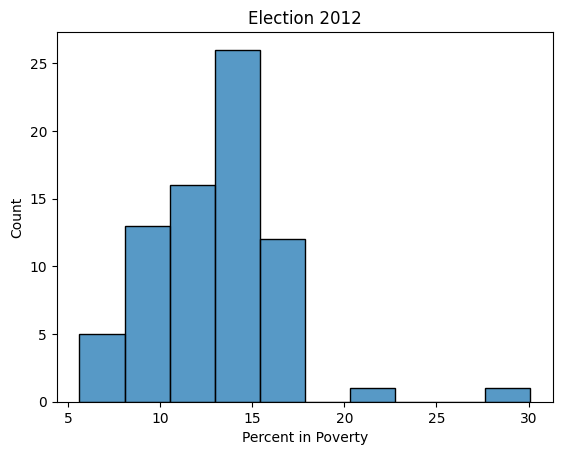

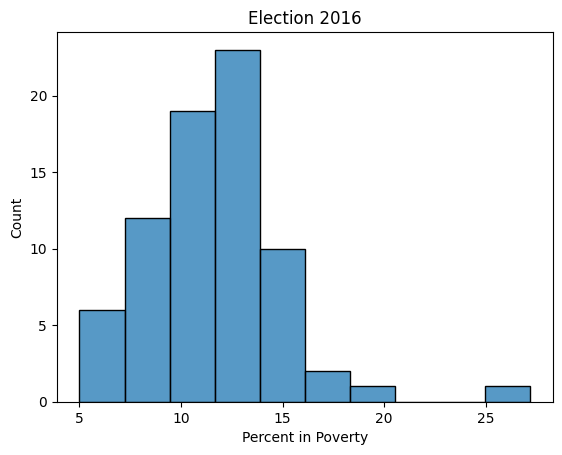

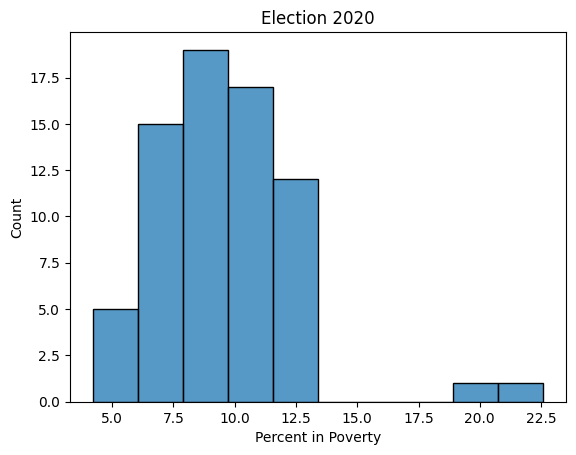

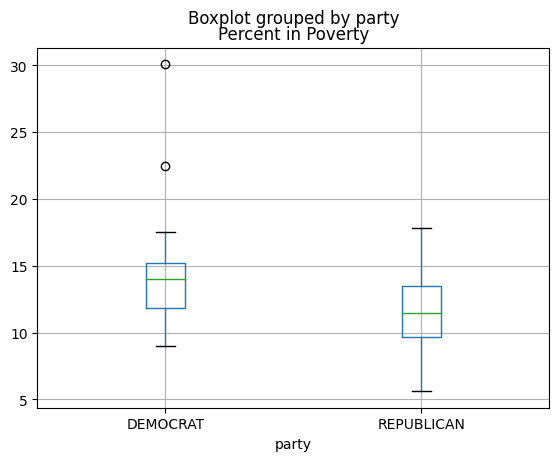

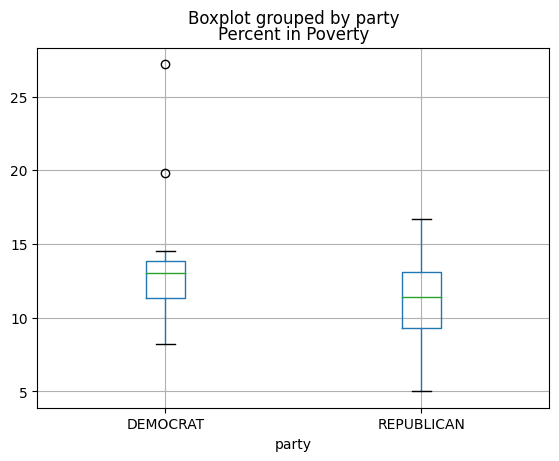

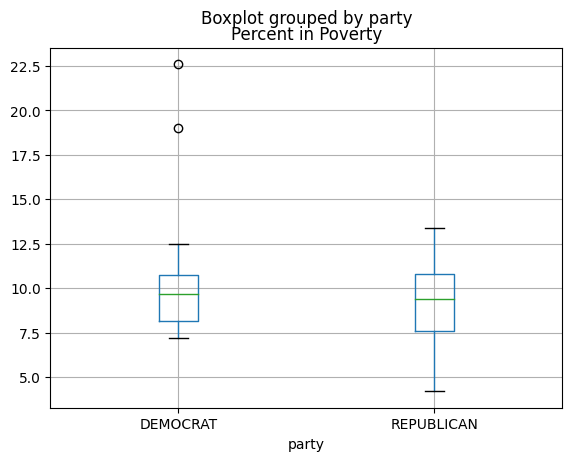

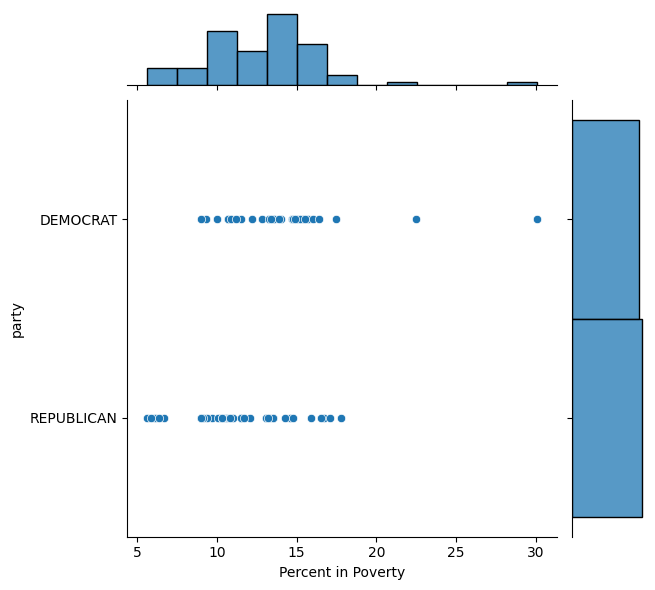

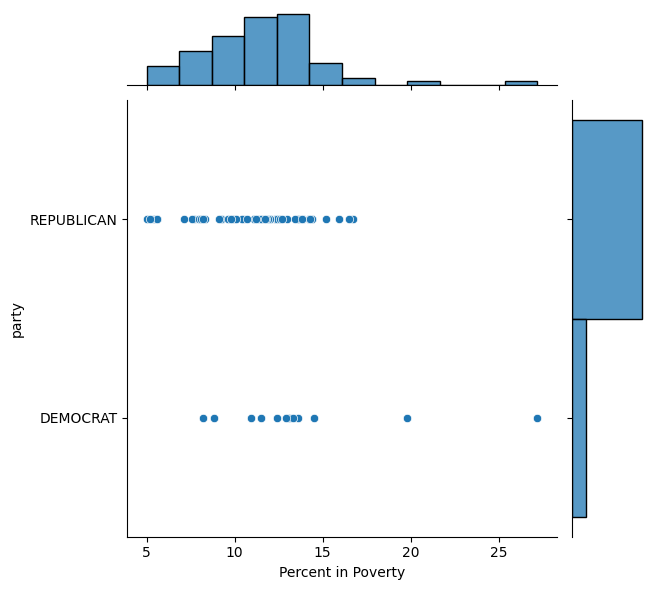

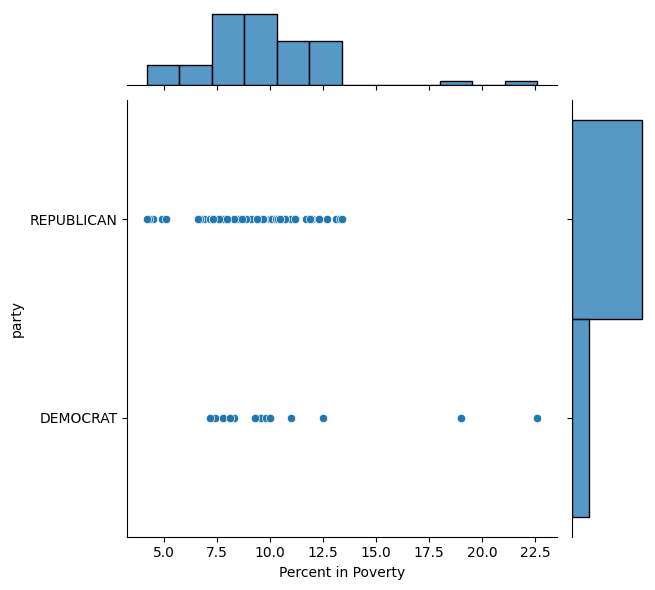

In [54]:
# EDA - Poverty

sns.histplot(election2012['Percent in Poverty'], bins = 10, figure=plt.figure())
plt.title('Election 2012')
sns.histplot(election2016['Percent in Poverty'], bins = 10, figure=plt.figure())
plt.title('Election 2016')
sns.histplot(election2020['Percent in Poverty'], bins = 10, figure=plt.figure()) # Histogram distribution of % in poverty
plt.title('Election 2020')

election2012.boxplot(column = 'Percent in Poverty',by = 'party')
election2016.boxplot(column = 'Percent in Poverty',by = 'party')
election2020.boxplot(column = 'Percent in Poverty',by = 'party') # Boxplot of county poverty rates by voted party

sns.jointplot(x=election2012['Percent in Poverty'],y=election2012['party'])
sns.jointplot(x=election2016['Percent in Poverty'],y=election2016['party'])
sns.jointplot(x=election2020['Percent in Poverty'],y=election2020['party']) # Joint plots (histogram x scatterplot)